# Basics of coding - Python

## Terminal:

* Check which files have been changed since the last commit and make sure that our working directory is clean

In [ ]:
git status

* Check what has changed in the file:

In [ ]:
git diff

* Pushing to Github:

In [ ]:
git add file.py
git commit -m "add file"
git push origin master

* Command that writes the full pathname of the current working directory:

In [4]:
!pwd 

/home/isa/code/anaiscasilva/Cheat sheet of Bootcamp


* Explore the folder

In [5]:
!ls -l

total 4
-rw-r--r-- 1 isa isa 3679 Oct  1 13:00 'Week 1.ipynb'


* Create a folder

In [ ]:
mkdir <directory>

* Go to a folder

In [ ]:
cd <path>

* Create a Python file:

In [ ]:
touch <file>

* Remove and move to a folder

In [ ]:
rm <file> # rm -r <directory>
mv <from> <to>

* Interactive Python shell on terminal:

In [ ]:
ipython 



During this first week, we will tackle the following challenges:

* Writing code with Python: variables, conditions, loops, list, dict, etc.
* Data collection: gather the data from different sources (CSV, API, Scraping)
* SQL: a lot can already be achieved at the database level, before relying on Python to sort data. Let’s dive into some advanced queries!



## Create a new Git Repo

In [ ]:
mkdir <repo>
cd <repo>
git init 
gh repo create

* Setting up the new Git Repo

In [ ]:
##...or Create a new repository on the command line

touch README.md
echo "# test" >> README.md
git init
git add README.md
git commit -m "first commit"
?git branch -M main
git remote add origin git@github.com:anaiscasilva/<reponame>.git
git push -u origin master

##...or Push an existing repository from the command line

git remote add origin git@github.com:anaiscasilva/<reponame>.git
?git branch -M main
git push -u origin master


## Python for Data Science - Coding:

In [2]:
# Function:

def xxxx(a):
    """docstring"""
    return a

xxxx(5)

5

In [1]:
# List comprehension:

words = ['cat', 'wolf', 'bear']

uppercase_words = [word.upper() for word in words]
print(uppercase_words)

['CAT', 'WOLF', 'BEAR']


In [2]:
# for loop on a list:

for index, word in enumerate(words):
    print(index, word)


0 cat
1 wolf
2 bear


In [4]:
# for loop on a dic:

animals = {'cat': 'orange', 'dog': 'black'}

for animal, color in animals.items():
    print(f'The {animal.capitalize()} is {color}')

The Cat is orange
The Dog is black


In [5]:
#While loop:

i = 1
while i <= 3:
    print(i)
    i = i + 1

1
2
3


In [9]:
# Debugging:

def full_name(first_name, last_name):
    """returns the full name"""
    name = f"{first_name.capitalize()}{last_name.capitalize()}"
    # Uncomment the line below and run your code to see the debugger in action
    import ipdb; ipdb.set_trace()
    name = f"{first_name.capitalize()} {last_name.capitalize()}".strip()
    return name

In [11]:
full_name('isa', 'silva')

> /tmp/ipykernel_9297/1950436766.py(6)full_name()
      5     import ipdb; ipdb.set_trace()
----> 6     name = f"{first_name.capitalize()} {last_name.capitalize()}".strip()
      7     return name

ipdb> next
> /tmp/ipykernel_9297/1950436766.py(7)full_name()
      5     import ipdb; ipdb.set_trace()
      6     name = f"{first_name.capitalize()} {last_name.capitalize()}".strip()
----> 7     return name

ipdb> continue


'Isa Silva'

In [ ]:
# ipython debugger
import ipdb; ipdb.set_trace()

>>> s (step into)
>>> n (next = step over)
>>> c (continue to next error)
>>> u (up stack trace), d(down)
>>> return (continue until current function return)
>>> l (provide more context)
>>> q (quit) or exit

## Data Sourcing

### CSV

* CSV Reading

In [ ]:
import csv
with open('data/file.csv') as csvfile:
    reader = csv.reader(csvfile, skipinitialspace=True)

* CSV with Headers

In [ ]:
import csv

with open('data/file.csv') as csvfile:
    reader = csv.DictReader(csvfile, skipinitialspace=True)

* Writing a CSV

In [ ]:
import csv

with open('data/file.csv', 'w') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=file[0].keys())

### CSV with Pandas

In [ ]:
pd.read_csv('data/file.csv')

### API

* HPPT requests

In [6]:
import requests

url = 'https://api.github.com/users/anaiscasilva'
response = requests.get(url).json()

print(response['name'])

Isa Silva


In [21]:
import requests

def fetch_lyrics(artists, title):
    """
    Get lyrics from Seeds Lyrics API. Returns empty string if song not found
    """
    url = f'https://lyrics.lewagon.ai/search?artist={artists}&title={title}'
    response = requests.get(url)
    if response.status_code != 200:
        return ''
    data = response.json()
    return data['lyrics']
fetch_lyrics('Ed sheeran', 'shape of you')[0:70]

"The club isn't the best place to find a lover\nSo the bar is where I go"

* Typical Web Scraper with BeautifulSoup

In [7]:
import requests
from bs4 import BeautifulSoup

response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

## SQL Basics 

We used SQLite: A database stored in a single file.

### Querying the Database

* With DBeaver

In [ ]:
SELECT * FROM Country

In [ ]:
SELECT COUNT(matches.id) AS match_count, matches.country_id
FROM "Match" AS matches
GROUP BY matches.country_id
HAVING match_count >= 3000
ORDER BY match_count DESC

In [ ]:
SELECT League.name, Country.name
FROM League
JOIN Country ON League.country_id = Country.id

* With Python

In [ ]:
import sqlite3

conn = sqlite3.connect('data/file.sqlite')
c = conn.cursor()

c.execute("SELECT * FROM Country")
rows = c.fetchall()
rows

## SQL Advanced

In [ ]:
import sqlite3

conn = sqlite3.connect('data/file_db.sqlite')
c = conn.cursor()

def connect_safe(username, password):
  query = """
    SELECT *
    FROM users
    WHERE users.username = ?
    AND users.password = ?
  """
  c.execute(query, (username, password))
  user = c.fetchone()
  if user is None:
    return "Unauthorized"
  else:
    return "Authorized"

...

### with pandas:

In [ ]:
df = pd.read_sql(
    '''
    SELECT *
    FROM animal a
    JOIN owners o ON o.id = a.owner_id
    ''', conn)

## Google BigQuery

In [ ]:
!pip install --quiet pandas-gbq

In [ ]:
import pandas_gbq

In [ ]:
sql = """
    SELECT *
    FROM animal a
    JOIN owners o ON o.id = a.owner_id
    """
df = pandas_gbq.read_gbq(sql, project_id=project_id)

# Data Toolkit

## Jupyter notebook shortcuts

Outside the cell (Command Mode):

In [ ]:
H: show all shortcuts
A : insert cell above
B : insert cell below
X : cut selected cells
C : copy selected cells
Shift + Enter: run the current cell, select below
Ctrl + S: save and checkpoint
Shift+Up : extend selected cells above
Shift+Down : extend selected cells below
Ctrl+A : select all cells
Shift-V : paste cells above
V : paste cells below
Z : undo cell deletion
D,D : delete selected cells
Shift+M : merge selected cells, or current cell with cell below if only one cell is selected
Shift+Space : scroll notebook up
Space : scroll notebook down
Esc : escape edit mode
Enter : enter edit mode
Y : change cell to code
M : change cell to markdown

Inside the cell (Edit Mode):

In [ ]:
Ctrl+A : select all
Ctrl+Z : undo
Ctrl+Up : go to cell start
Ctrl+End : go to cell end
Ctrl+Backspace : delete word before
Ctrl+Delete : delete word after
Ctrl+Y : redo
Esc : enter command mode
Shift+Enter : run cell, select below

### Extract the Python code to Notebook: 

In [ ]:
%load_ext autoreload
%autoreload 2

In [25]:
# animals.py

def animal(x):
    return x


In [27]:
from animals import animal
animal('zz')

'zz'

## Numpy 

* Numpy Cheat Sheet: 

In [ ]:
https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf

In [8]:
import numpy as np

In [9]:
np.array([[1,2,3], [4,5,6]])

array([[1, 2, 3],
       [4, 5, 6]])

In [10]:
np.arange(0, 10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## Pandas

* Pandas Cheat Sheet:

In [ ]:
https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

In [11]:
import pandas as pd

In [14]:
df = pd.DataFrame(
    [[5, 7, 10],
     [7, 16, 9],
     [6, 9, 15]],
    index=['a', 'b', 'c'],
    columns=["green", "blue", "yellow"]
)
df

,green,blue,yellow
a,5,7,10
b,7,16,9
c,6,9,15


In [ ]:
file = "animals.csv"
animals_df = pd.read_csv(file, decimal=',')

In [ ]:
animals_df.shape
animals_df.dtypes
animals_df.info()
animals_df.describe()
animals_df.isnull().sum()
animals_df.head()
animals_df.tail()

In [ ]:
animals_df[animals_df["Number of colors"] >= 2]

In [ ]:
dict_df = pd.DataFrame.from_dict(dict)

...

## Matplotlib

* Matplotlib Cheat Sheet:

In [ ]:
https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf

In [29]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(x, y, label='total', c="grey", ls=':', marker='s')
plt.legend()
plt.title("animals")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(lw=0.5)
plt.show()

In [ ]:
plt.bar(x, y);

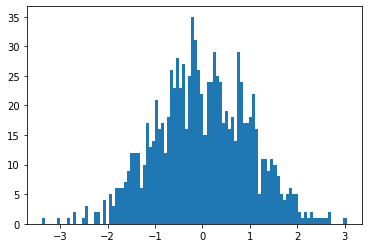

In [30]:
import numpy as np

x = np.random.normal(size=1000) # Randomly pick 1000 numbers
plt.hist(x, bins=100); 


...

### Subplots

In [ ]:
# Start a figure
plt.figure(figsize=(10,5))
# First subplot
plt.subplot(1,2,1)
plt.plot(x, y, label="br")
plt.title('cool')
plt.legend()
# Second subplot
plt.subplot(1,2,2) 
plt.plot(x_2, y_2, label="tr", c='black')
plt.title("train")
# Global figure methods
plt.suptitle('All')
plt.show()

or...

In [ ]:
fig = plt.figure(figsize=(10,3))

# First subplot
ax1 = fig.add_subplot(1,2,1)
ax1.plot(x, y, label="br")
ax1.set_title('cool')
ax1.legend()

# Second subplot
ax2 = fig.add_subplot(1,2,2)
ax2.plot(x_2, y_2, label="tr", c='black')
ax2.set_title('train')

# Global figure methods
fig.suptitle('All')
plt.show()

...

### With pandas/dataframes

In [ ]:
plt.scatter(df['a'], df['b'], edgecolor='#333333', alpha=0.75)
plt.xscale('log')
plt.yscale('log')

In [ ]:
%matplotlib inline
import matplotlib

In [ ]:
df.plot(kind="bar")

In [ ]:
df.hist(grid=False, bins=22, figsize=(10, 5))

## Seaborn 

* Seaborn Cheat Sheet:

In [ ]:
https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf

In [ ]:
import seaborn as sns

In [ ]:
sns.histplot(df['total'], kde=True);
sns.countplot(x="animals", data=df);
sns.countplot(x="color", hue="animals", data=df);
sns.catplot(x='animals', y='total', data=df);
sns.scatterplot(x="animals', y='total", data=df);
sns.regplot(x='animals', y='total', data=df)

sns.set(style='white')
sns.pairplot(df, height=2)
plt.show()
